# Demo

# Python basics + Understanding the interface

## Import the necessary packages

In [3]:
import pandas as pd #DataFrame Handeling
import sklearn as sk #main DataScience library
import numpy as np
from copy import deepcopy

#plottiing libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Import the data and summarize

Dataset - https://www.kaggle.com/datasets/nareshbhat/health-care-data-set-on-heart-attack-possibility?resource=download


Attribute Information
1) age
2) sex
3) chest pain type (4 values)
4) resting blood pressure
5) serum cholestoral in mg/dl
6)fasting blood sugar > 120 mg/dl
7) resting electrocardiographic results (values 0,1,2)
8) maximum heart rate achieved
9) exercise induced angina
10) oldpeak = ST depression induced by exercise relative to rest
11)the slope of the peak exercise ST segment
12) number of major vessels (0-3) colored by flourosopy
13) thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
14) target: 0= less chance of heart attack 1= more chance of heart attack --> presence of heart disease

In [4]:
df = pd.read_csv('heart.csv')

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.shape

(303, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<AxesSubplot:ylabel='Frequency'>

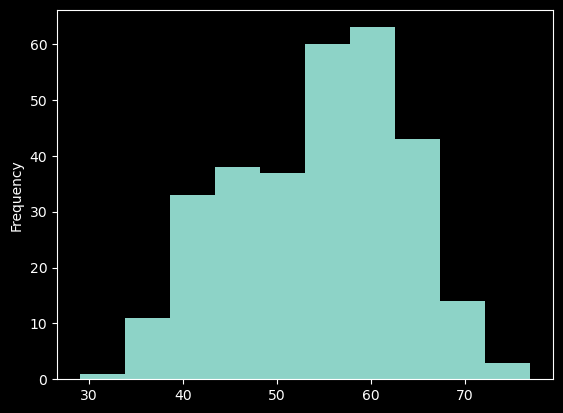

In [8]:
df['age'].plot.hist()

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<AxesSubplot:xlabel='target', ylabel='count'>

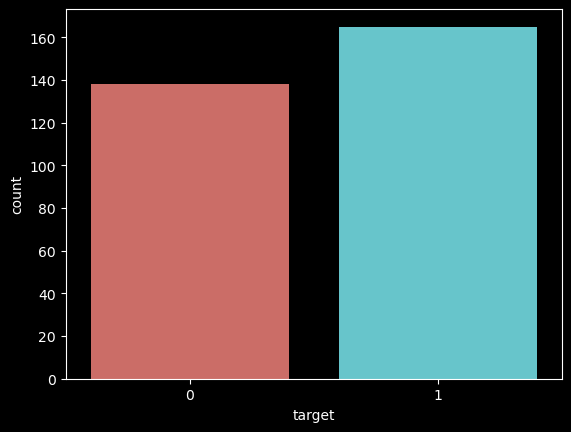

In [10]:
sns.countplot(x='target',data=df,palette='hls')

# Train and Test split

In [11]:
y = deepcopy(df['target'].values)
X = deepcopy(df.drop('target', axis=1).values)

dfX = deepcopy(df.drop('target', axis=1))

In [12]:
print(f'Original DataFrame: Num Samples {df.shape[0]}, Num Columns {df.shape[1]}')
print(f'X Dataframe: Num Samples {X.shape[0]}, Num Columns {X.shape[1]}')
print(f'y : Num Samples {y.shape[0]}')

Original DataFrame: Num Samples 303, Num Columns 14
X Dataframe: Num Samples 303, Num Columns 13
y : Num Samples 303


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print(f'X DataFrame: Train Samples {X_train.shape[0]}, Test Samples {X_test.shape[0]}')
print('y_Train target distribution')
print(pd.Series(y_train).value_counts(normalize=True))
print('y_test target distribution')
print(pd.Series(y_test).value_counts(normalize=True))


X DataFrame: Train Samples 203, Test Samples 100
y_Train target distribution
1    0.527094
0    0.472906
dtype: float64
y_test target distribution
1    0.58
0    0.42
dtype: float64


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,stratify=y,shuffle=True)

print(f'X DataFrame: Train Samples {X_train.shape[0]}, Test Samples {X_test.shape[0]}')
print('y_Train target distribution')
print(pd.Series(y_train).value_counts(normalize=True))
print('y_test target distribution')
print(pd.Series(y_test).value_counts(normalize=True))


X DataFrame: Train Samples 203, Test Samples 100
y_Train target distribution
1    0.546798
0    0.453202
dtype: float64
y_test target distribution
1    0.54
0    0.46
dtype: float64


# Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression

## Basic Model Building and Testing Procedure

In [17]:
# model = LogisticRegression(fit_intercept = True, penalty='l2', random_state=3, max_iter=1000)
model=LogisticRegression(fit_intercept=True,penalty='none',max_iter=1000)
model.fit(X_train, y_train)

/Users/maitray/opt/anaconda3/envs/py10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, penalty='none')

#### SideNote - model fits can be done similairity with different packages

In [18]:
model.classes_

array([0, 1])

In [19]:
pd.DataFrame(np.vstack([dfX.columns,model.coef_]))

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
1,-0.005008,-1.781208,1.088537,-0.006313,-0.011946,0.284802,0.252767,0.030669,-1.13251,-0.549004,0.725147,-0.631349,-1.080993


In [20]:
import statsmodels.api as sm
from statsmodels.tools import add_constant

logit_model = sm.Logit(y_train,add_constant(X_train))
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.321553
         Iterations 8


In [21]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  203
Model:                          Logit   Df Residuals:                      189
Method:                           MLE   Df Model:                           13
Date:                Fri, 03 Feb 2023   Pseudo R-squ.:                  0.5331
Time:                        00:03:59   Log-Likelihood:                -65.275
converged:                       True   LL-Null:                       -139.82
Covariance Type:            nonrobust   LLR p-value:                 3.149e-25
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4436      3.368      0.726      0.468      -4.157       9.044
x1            -0.0050      0.031     -0.162      0.871      -0.065       0.055
x2            -1.7870      0.607     -2.944      0.003      -2.977      -0.597
x3             1.0900      0.244      4.461      0.000       0.611       1.569
x4            -0.0063      0.013     -0.502      0.616      -0.031       0.018
x5            -0.0120      0.006     -1.844      0.065      -0.025       0.001
x6             0.2786      0.763      0.365      0.715      -1.218       1.775
x7             0.2536      0.447      0.567      0.571      -0.623       1.130
x8             0.0307      0.014      2.118      0.034       0.002       0.059
x9            -1.1388      0.518     -2.198      0.028      -2.154      -0.123
x10           -0.5492      0.259     -2.122      0.034      -1.056      -0.042
x11            0.7241      0.449      1.612      0.107      -0.156       1.605
x12           -0.6305      0.252     -2.507      0.012      -1.124      -0.138
x13           -1.0858      0.373     -2.907      0.004      -1.818      -0.354
==============================================================================
"""

## Predictions!

In [22]:
#Small Number for demo
y_pred = model.predict(X_test[0:5])
y_true = y_test[0:5]
pd.DataFrame(np.vstack([y_pred,y_true]).T,columns=['Prediction','Truth'])

,Prediction,Truth
0,0,0
1,0,0
2,1,1
3,1,1
4,0,0


In [23]:
y_pred = model.predict(X_test)
pd.DataFrame(np.vstack([y_pred,y_test]).T,columns=['Prediction','Truth'])

,Prediction,Truth
0,0,0
1,0,0
2,1,1
3,1,1
4,0,0
...,...,...
95,1,1
96,1,1
97,0,0
98,1,0


In [24]:
model.score(X_test,y_test) # Accuracy 

0.77

### Scoring Metrics

Model Evaluation = https://scikit-learn.org/stable/modules/model_evaluation.html


In [25]:
y_pred = model.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,roc_auc_score

In [27]:
accuracy_score(y_test,y_pred)
# f1_score(y_test,y_pred)

0.77

In [28]:
lScorers = [accuracy_score, f1_score, precision_score, recall_score,roc_auc_score]
lScorersName = ['accuracy_score', 'f1_score', 'precision_score', 'recall_score','roc_auc_score']
lScores = [x(y_test,y_pred) for x in lScorers]
resultsLogit = pd.DataFrame(np.vstack([lScorersName,lScores]).T, columns=['Scorer','Results Logit'])
resultsLogit


,Scorer,Results Logit
0,accuracy_score,0.77
1,f1_score,0.7964601769911505
2,precision_score,0.7627118644067796
3,recall_score,0.8333333333333334
4,roc_auc_score,0.7644927536231885


# Different Model - Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
# Step 1: Define Model
model= RandomForestClassifier(n_estimators=1000, max_depth=None, random_state=3) #100, 20, 1000, 

# Step 2: Fit model with Training Data
model.fit(X_train, y_train)

# Step 3: Make predicitons with testing data
y_pred = model.predict(X_test)

# Step 4: Assess Scores
lScorers = [accuracy_score, f1_score, precision_score, recall_score,roc_auc_score]
lScorersName = ['accuracy_score', 'f1_score', 'precision_score', 'recall_score','roc_auc_score']
lScores = [x (y_test,y_pred) for x in lScorers]
resultsRF = pd.DataFrame(np.vstack([lScorersName,lScores]).T,columns=['Scorer','Results RF'])
dfResults = pd.merge(resultsLogit,resultsRF)
dfResults

,Scorer,Results Logit,Results RF
0,accuracy_score,0.77,0.79
1,f1_score,0.7964601769911505,0.817391304347826
2,precision_score,0.7627118644067796,0.7704918032786885
3,recall_score,0.8333333333333334,0.8703703703703703
4,roc_auc_score,0.7644927536231885,0.7830112721417068


# Different Model - K Nearest Neighbours

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
# Step 1: Define Model
model = KNeighborsClassifier(n_neighbors=3)

# Step 2: Fit model with Training Data
model.fit(X_train, y_train)

# Step 3: Make predicitons with testing data
y_pred = model.predict(X_test)

# Step 4: Assess Scores
lScorers = [accuracy_score, f1_score, precision_score, recall_score,roc_auc_score]
lScorersName = ['accuracy_score', 'f1_score', 'precision_score', 'recall_score','roc_auc_score']
lScores = [x (y_test,y_pred) for x in lScorers]
resultsKNN = pd.DataFrame(np.vstack([lScorersName,lScores]).T,columns=['Scorer','Results KNN'])
dfResults = pd.merge(dfResults,resultsKNN)
dfResults

/Users/maitray/opt/anaconda3/envs/py10/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


,Scorer,Results Logit,Results RF,Results KNN
0,accuracy_score,0.77,0.79,0.65
1,f1_score,0.7964601769911505,0.817391304347826,0.6788990825688074
2,precision_score,0.7627118644067796,0.7704918032786885,0.6727272727272727
3,recall_score,0.8333333333333334,0.8703703703703703,0.6851851851851852
4,roc_auc_score,0.7644927536231885,0.7830112721417068,0.6469404186795492


### Scaling

In [33]:
# Scaling
from sklearn import preprocessing
X_scale = preprocessing.scale(X)

X_train_scale, X_test_scale, y_train, y_test = train_test_split(
    X_scale, y, test_size=0.33, random_state=42)


In [34]:
from sklearn.neighbors import KNeighborsClassifier
# Step 1: Define Model
model = KNeighborsClassifier(n_neighbors=3)

# Step 2: Fit model with Training Data
model.fit(X_train_scale, y_train)

# Step 3: Make predicitons with testing data
y_pred = model.predict(X_test_scale)

# Step 4: Assess Scores
lScorers = [accuracy_score, f1_score,
            precision_score, recall_score, roc_auc_score]
lScorersName = ['accuracy_score', 'f1_score',
                'precision_score', 'recall_score', 'roc_auc_score']
lScores = [x(y_test, y_pred) for x in lScorers]
resultsKNN = pd.DataFrame(np.vstack([lScorersName, lScores]).T, columns=['Scorer', 'Results KNN_Scale'])
dfResults = pd.merge(dfResults, resultsKNN)
dfResults

/Users/maitray/opt/anaconda3/envs/py10/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


,Scorer,Results Logit,Results RF,Results KNN,Results KNN_Scale
0,accuracy_score,0.77,0.79,0.65,0.83
1,f1_score,0.7964601769911505,0.817391304347826,0.6788990825688074,0.8440366972477066
2,precision_score,0.7627118644067796,0.7704918032786885,0.6727272727272727,0.9019607843137255
3,recall_score,0.8333333333333334,0.8703703703703703,0.6851851851851852,0.7931034482758621
4,roc_auc_score,0.7644927536231885,0.7830112721417068,0.6469404186795492,0.8370279146141215


# Cross-Validation

In [48]:
from sklearn.model_selection import cross_val_score,cross_validate

In [49]:
model= RandomForestClassifier(n_estimators=1000, max_depth=None, random_state=3) #100, 20, 1000, 
results = cross_val_score(model,X,y, cv=5)

print(results.mean())
results

#Previous train-test split --> accuracy = 0.77

0.8215300546448088


array([0.83606557, 0.90163934, 0.80327869, 0.8       , 0.76666667])

In [126]:
modelRF= RandomForestClassifier(n_estimators=1000, max_depth=None, random_state=3) #100, 20, 1000, 

# scoring = {'acc': 'accuracy',
#            'precision': 'precision_macro',
#            'rec_micro': 'recall_macro'}

results = cross_validate(model,X,y, cv=5,scoring=['accuracy', 'recall','precision','f1','roc_auc'])

dfresultsCVRF = pd.DataFrame(results)

#Previous train-test split --> accuracy = 0.77

In [127]:
dfresultsCV.mean()

test_accuracy    0.699891
test_f1          0.731785
dtype: float64

# Dimensionality Reduction

In [59]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

## PCA

In [63]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(X)


dfPCAComps = pd.DataFrame(pca_result, columns=['comp1','comp2','comp3'])

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.7475642  0.15037022 0.08459685]


/var/folders/x2/zky3vt3545n1v1g99xx5zxr80000gn/T/ipykernel_67097/1024188363.py:1: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.figure(figsize=(16,10)).gca(projection='3d')


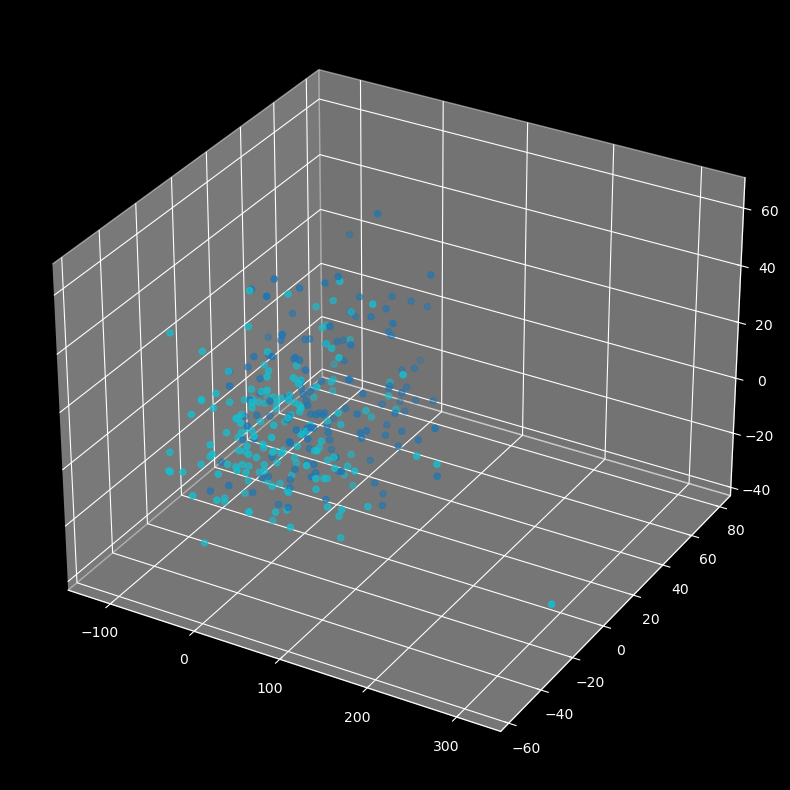

In [66]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=dfPCAComps.loc[:,:]["comp1"], 
    ys=dfPCAComps.loc[:,:]["comp2"], 
    zs=dfPCAComps.loc[:,:]["comp3"], 
    c=y, 
    cmap='tab10'
)
# ax.set_xlabel('pca-one')
# ax.set_ylabel('pca-two')
# ax.set_zlabel('pca-three')
plt.show()

In [89]:
model= RandomForestClassifier(n_estimators=1000, max_depth=None, random_state=3)

results = cross_validate(model,X,y, cv=5,scoring=['accuracy', 'recall','precision','f1','roc_auc'])

dfresultsCVNonPCA = pd.DataFrame(results)[['test_accuracy','test_f1']]
dfresultsCVNonPCA
#Previous train-test split --> accuracy = 0.77
#Previous CV  --> accuracy = 0.82

dfresultsCVNonPCA

,test_accuracy,test_f1
0,0.836066,0.852941
1,0.901639,0.906250
2,0.803279,0.812500
3,0.800000,0.823529
4,0.766667,0.805556


In [88]:
model= RandomForestClassifier(n_estimators=1000, max_depth=None, random_state=3)
results = cross_validate(model,dfPCAComps,y, cv=5,scoring=['accuracy', 'recall','precision','f1','roc_auc'])
dfresultsCVPCA = pd.DataFrame(results)[['test_accuracy','test_f1']]
dfresultsCVPCA
#Previous train-test split --> accuracy = 0.77
#Previous CV  --> accuracy = 0.82


## TSNE

In [85]:
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X)

dfTSNEComps = pd.DataFrame(tsne_results, columns=['comp1','comp2'])


/Users/maitray/opt/anaconda3/envs/py10/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/maitray/opt/anaconda3/envs/py10/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [86]:
dfTSNEComps

,comp1,comp2
0,1.093825,2.818942
1,-2.575377,-2.817394
2,-7.604105,6.562667
3,-3.900126,-0.346707
4,7.597809,-14.186552
...,...,...
298,4.447757,2.307914
299,6.386371,-2.287125
300,-4.615068,10.820401
301,-13.238591,12.745950


In [90]:
model= RandomForestClassifier(n_estimators=1000, max_depth=None, random_state=3)
results = cross_validate(model,dfTSNEComps,y, cv=5,scoring=['accuracy', 'recall','precision','f1','roc_auc'])
dfresultsCVTSNE = pd.DataFrame(results)[['test_accuracy','test_f1']]
dfresultsCVTSNE
#Previous train-test split --> accuracy = 0.77
#Previous CV  --> accuracy = 0.82


,test_accuracy,test_f1
0,0.639344,0.666667
1,0.573770,0.638889
2,0.622951,0.676056
3,0.583333,0.626866
4,0.583333,0.647887


# Boruta Feature Selection

In [106]:
from boruta import BorutaPy
model = RandomForestClassifier(n_estimators=1000, max_depth=None, random_state=3)
feat_selector = BorutaPy(model, n_estimators='auto', verbose=0, random_state=1)

feat_selector.fit(X, y)

BorutaPy(estimator=RandomForestClassifier(n_estimators=37,
                                          random_state=RandomState(MT19937) at 0x7FE43B1C5D40),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7FE43B1C5D40)

In [108]:
borutaRanking = pd.DataFrame(np.vstack([feat_selector.ranking_, dfX.columns]).T,columns=['Rank','Column']).sort_values('Rank')
borutaRanking

,Rank,Column
0,1,age
2,1,cp
7,1,thalach
9,1,oldpeak
11,1,ca
12,1,thal
8,2,exang
4,3,chol
10,4,slope
3,5,trestbps


In [115]:
lColsSelect = borutaRanking[borutaRanking['Rank']==1]['Column']
X_filtered = dfX[lColsSelect]

In [125]:
model= RandomForestClassifier(n_estimators=1000, max_depth=None, random_state=3)
results = cross_validate(model,X_filtered,y, cv=5,scoring=['accuracy', 'recall','precision','f1','roc_auc'])
dfresultsCVBoruta = pd.DataFrame(results)[['test_accuracy','test_f1']]
dfresultsCVBoruta.mean()

test_accuracy    0.775301
test_f1          0.801377
dtype: float64

In [124]:
dfresultsCVRF[['test_accuracy','test_f1']].mean()

test_accuracy    0.814973
test_f1          0.833913
dtype: float64

In [136]:
pd.DataFrame(np.vstack([dfX.columns, modelRF.fit(X,y).feature_importances_]).T,columns=['Column','Importance']).sort_values('Importance',ascending=False)

,Column,Importance
2,cp,0.138954
7,thalach,0.120753
9,oldpeak,0.113142
11,ca,0.112561
12,thal,0.106793
0,age,0.087488
4,chol,0.075786
3,trestbps,0.072885
8,exang,0.05511
10,slope,0.051883
